In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [ ]:
food_price = pd.read_csv("/content/WLD_RTFP_country_2023-10-02.csv")

In [ ]:
food_price

,Open,High,Low,Close,Inflation,country,ISO3,date
0,0.53,0.54,0.53,0.53,NaN,Afghanistan,AFG,2007-01-01
1,0.53,0.54,0.53,0.53,NaN,Afghanistan,AFG,2007-02-01
2,0.54,0.54,0.53,0.53,NaN,Afghanistan,AFG,2007-03-01
3,0.53,0.55,0.53,0.55,NaN,Afghanistan,AFG,2007-04-01
4,0.56,0.57,0.56,0.57,NaN,Afghanistan,AFG,2007-05-01
...,...,...,...,...,...,...,...,...
4793,2.74,2.78,2.70,2.75,-0.28,"Yemen, Rep.",YEM,2023-06-01
4794,2.79,2.83,2.75,2.81,-1.85,"Yemen, Rep.",YEM,2023-07-01
4795,2.85,2.89,2.81,2.83,-3.17,"Yemen, Rep.",YEM,2023-08-01
4796,2.86,2.97,2.82,2.97,1.68,"Yemen, Rep.",YEM,2023-09-01


In [ ]:
food_price.shape

(4798, 8)

In [ ]:
food_price.isnull().sum()

Open          64
High          64
Low           64
Close         64
Inflation    364
country        0
ISO3           0
date           0
dtype: int64

In [ ]:
food_price.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Inflation    float64
country       object
ISO3          object
date          object
dtype: object

In [ ]:
food_price['country'].value_counts()

country
Afghanistan                 202
Somalia                     202
Nigeria                     202
Niger                       202
Mozambique                  202
Mali                        202
Liberia                     202
Burundi                     202
Lao PDR                     202
South Sudan                 202
Haiti                       202
Guinea-Bissau               202
Gambia, The                 202
Chad                        202
Congo, Dem. Rep.            202
Cameroon                    202
Central African Republic    202
Burkina Faso                202
Sudan                       202
Myanmar                     190
Yemen, Rep.                 178
Syrian Arab Republic        154
Congo, Rep.                 154
Iraq                        142
Lebanon                     142
Name: count, dtype: int64

In [ ]:
mean_inflation = food_price.groupby('country')['Inflation'].mean()
mean_inflation

country
Afghanistan                  7.585579
Burkina Faso                 8.713789
Burundi                      8.850684
Cameroon                     2.789272
Central African Republic     6.324526
Chad                         4.592000
Congo, Dem. Rep.             7.071737
Congo, Rep.                  1.503239
Gambia, The                  6.809053
Guinea-Bissau                2.365947
Haiti                       15.875737
Iraq                         1.497538
Lao PDR                      6.877212
Lebanon                     56.399769
Liberia                      7.672053
Mali                         4.578789
Mozambique                   8.557263
Myanmar                     11.916404
Niger                        3.863632
Nigeria                     11.210526
Somalia                      6.645526
South Sudan                 62.917316
Sudan                       65.871632
Syrian Arab Republic        41.698803
Yemen, Rep.                 13.863735
Name: Inflation, dtype: float64

In [ ]:
food_price['Open'] = food_price.groupby('country')['Open'].transform(lambda x: x.fillna(x.mean()))
food_price['High'] = food_price.groupby('country')['High'].transform(lambda x: x.fillna(x.mean()))
food_price['Low'] = food_price.groupby('country')['Low'].transform(lambda x: x.fillna(x.mean()))
food_price['Close'] = food_price.groupby('country')['Close'].transform(lambda x: x.fillna(x.mean()))
food_price['Inflation'] = food_price.groupby('country')['Inflation'].transform(lambda x: x.fillna(x.mean()))

In [ ]:
food_price

,Open,High,Low,Close,Inflation,country,ISO3,date
0,0.53,0.54,0.53,0.53,7.585579,Afghanistan,AFG,2007-01-01
1,0.53,0.54,0.53,0.53,7.585579,Afghanistan,AFG,2007-02-01
2,0.54,0.54,0.53,0.53,7.585579,Afghanistan,AFG,2007-03-01
3,0.53,0.55,0.53,0.55,7.585579,Afghanistan,AFG,2007-04-01
4,0.56,0.57,0.56,0.57,7.585579,Afghanistan,AFG,2007-05-01
...,...,...,...,...,...,...,...,...
4793,2.74,2.78,2.70,2.75,-0.280000,"Yemen, Rep.",YEM,2023-06-01
4794,2.79,2.83,2.75,2.81,-1.850000,"Yemen, Rep.",YEM,2023-07-01
4795,2.85,2.89,2.81,2.83,-3.170000,"Yemen, Rep.",YEM,2023-08-01
4796,2.86,2.97,2.82,2.97,1.680000,"Yemen, Rep.",YEM,2023-09-01


In [ ]:
label_encoder = LabelEncoder()
food_price['country'] = label_encoder.fit_transform(food_price['country'])

In [ ]:
food_price['date'] = pd.to_datetime(food_price['date'])
food_price['year'] = food_price['date'].dt.year
food_price['month'] = food_price['date'].dt.month
food_price['day'] = food_price['date'].dt.day
food_price

,Open,High,Low,Close,Inflation,country,ISO3,date,year,month,day
0,0.53,0.54,0.53,0.53,7.585579,0,AFG,2007-01-01,2007,1,1
1,0.53,0.54,0.53,0.53,7.585579,0,AFG,2007-02-01,2007,2,1
2,0.54,0.54,0.53,0.53,7.585579,0,AFG,2007-03-01,2007,3,1
3,0.53,0.55,0.53,0.55,7.585579,0,AFG,2007-04-01,2007,4,1
4,0.56,0.57,0.56,0.57,7.585579,0,AFG,2007-05-01,2007,5,1
...,...,...,...,...,...,...,...,...,...,...,...
4793,2.74,2.78,2.70,2.75,-0.280000,24,YEM,2023-06-01,2023,6,1
4794,2.79,2.83,2.75,2.81,-1.850000,24,YEM,2023-07-01,2023,7,1
4795,2.85,2.89,2.81,2.83,-3.170000,24,YEM,2023-08-01,2023,8,1
4796,2.86,2.97,2.82,2.97,1.680000,24,YEM,2023-09-01,2023,9,1


In [ ]:
food_price.drop(['ISO3','date'],axis = 1,inplace = True)
food_price

,Open,High,Low,Close,Inflation,country,year,month,day
0,0.53,0.54,0.53,0.53,7.585579,0,2007,1,1
1,0.53,0.54,0.53,0.53,7.585579,0,2007,2,1
2,0.54,0.54,0.53,0.53,7.585579,0,2007,3,1
3,0.53,0.55,0.53,0.55,7.585579,0,2007,4,1
4,0.56,0.57,0.56,0.57,7.585579,0,2007,5,1
...,...,...,...,...,...,...,...,...,...
4793,2.74,2.78,2.70,2.75,-0.280000,24,2023,6,1
4794,2.79,2.83,2.75,2.81,-1.850000,24,2023,7,1
4795,2.85,2.89,2.81,2.83,-3.170000,24,2023,8,1
4796,2.86,2.97,2.82,2.97,1.680000,24,2023,9,1


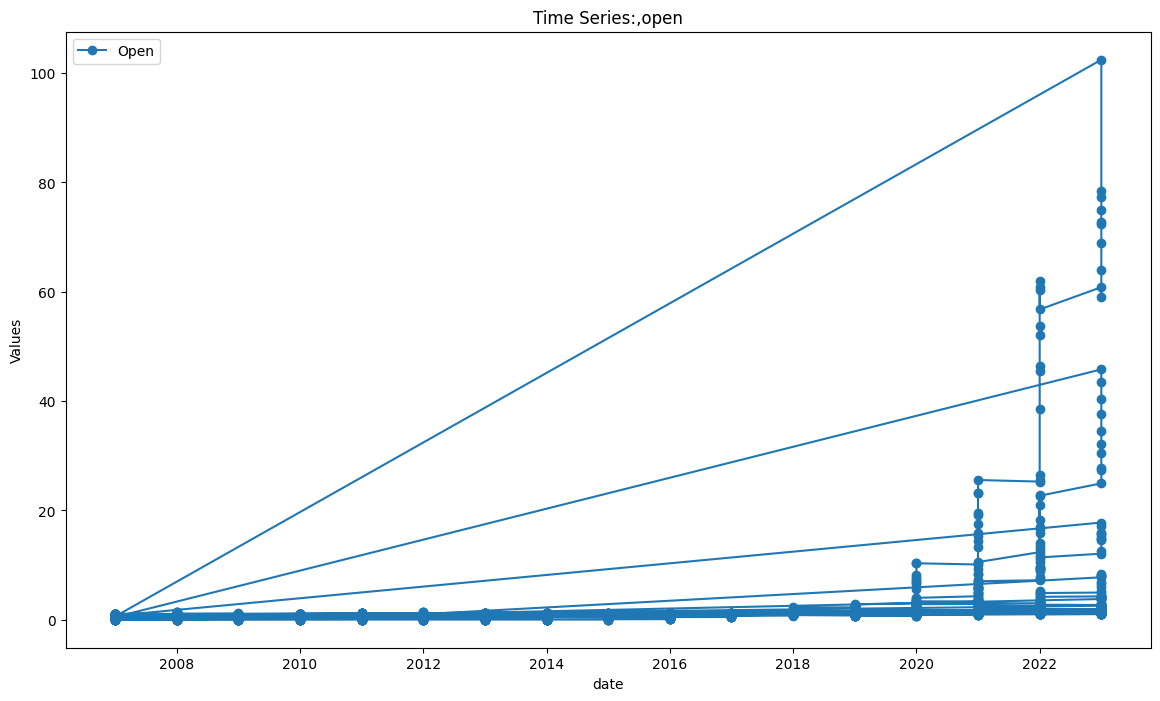

In [ ]:
plt.figure(figsize=(14, 8))
plt.plot(food_price['year'], food_price['Open'], label='Open',marker='o')

plt.title('Time Series:,open')
plt.xlabel('date')
plt.ylabel('Values')
plt.legend()
plt.show()

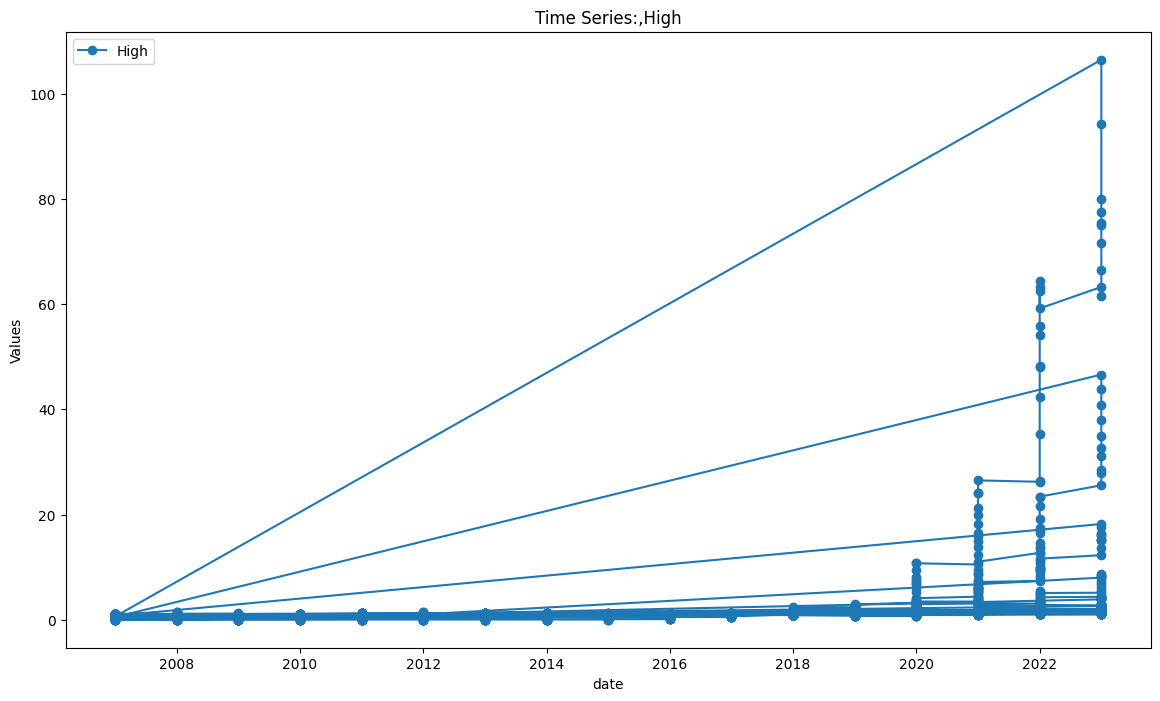

In [ ]:
plt.figure(figsize=(14, 8))
plt.plot(food_price['year'], food_price['High'], label='High',marker='o')

plt.title('Time Series:,High')
plt.xlabel('date')
plt.ylabel('Values')
plt.legend()
plt.show()

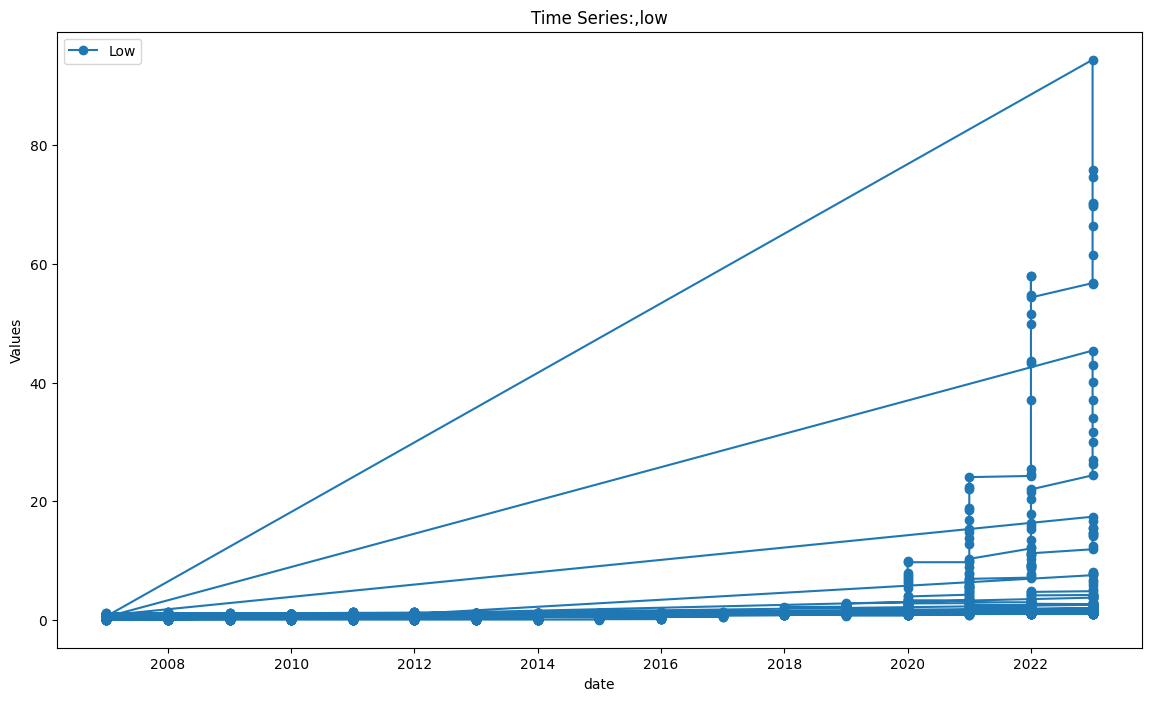

In [ ]:
plt.figure(figsize=(14, 8))
plt.plot(food_price['year'], food_price['Low'], label='Low',marker='o')

plt.title('Time Series:,low')
plt.xlabel('date')
plt.ylabel('Values')
plt.legend()
plt.show()

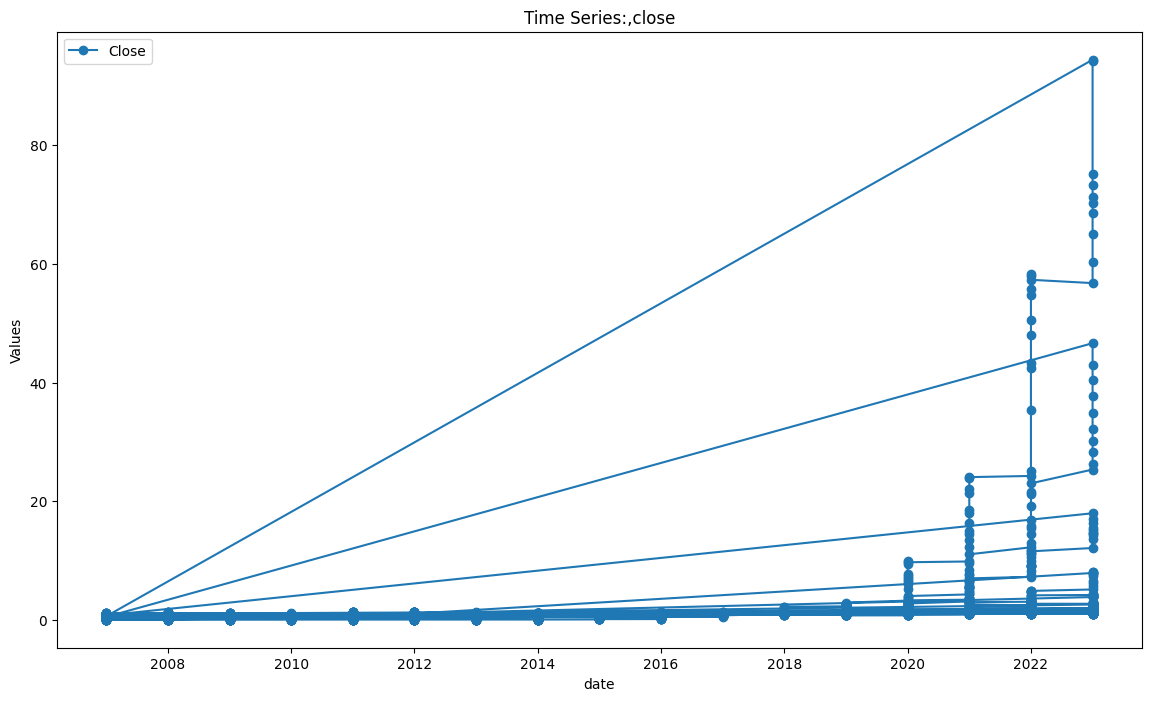

In [ ]:
plt.figure(figsize=(14, 8))
plt.plot(food_price['year'], food_price['Close'], label='Close',marker='o')

plt.title('Time Series:,close')
plt.xlabel('date')
plt.ylabel('Values')
plt.legend()
plt.show()

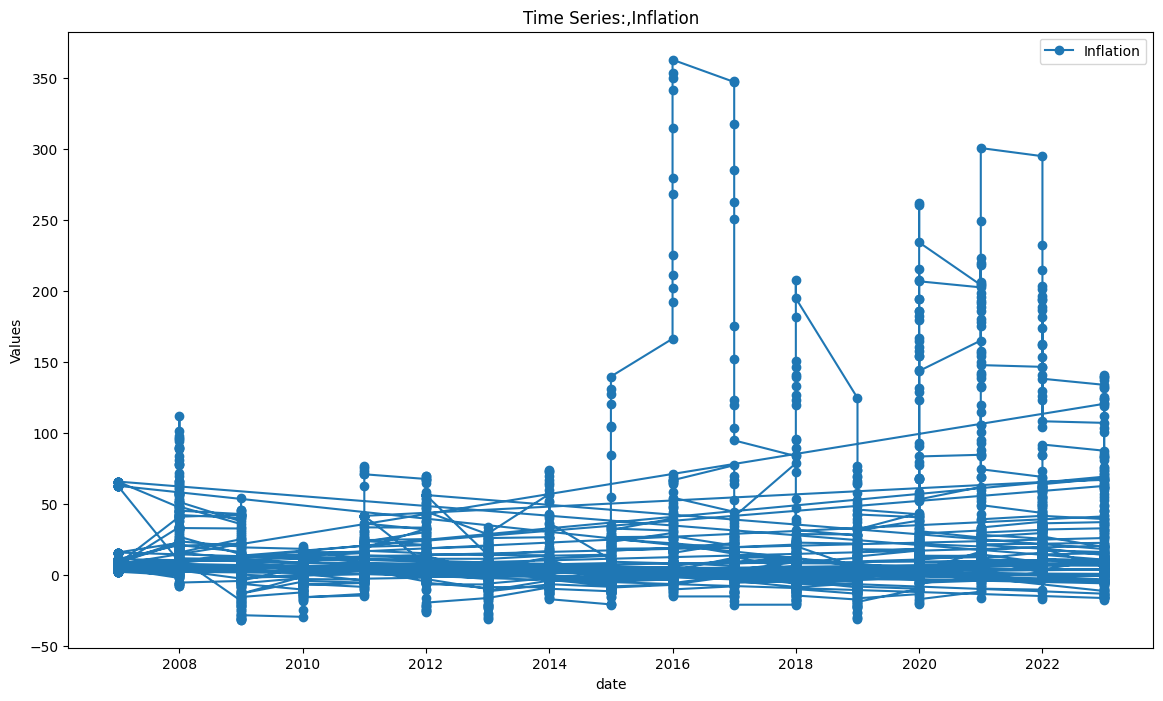

In [ ]:
plt.figure(figsize=(14, 8))
plt.plot(food_price['year'], food_price['Inflation'], label='Inflation',marker='o')

plt.title('Time Series:,Inflation')
plt.xlabel('date')
plt.ylabel('Values')
plt.legend()
plt.show()

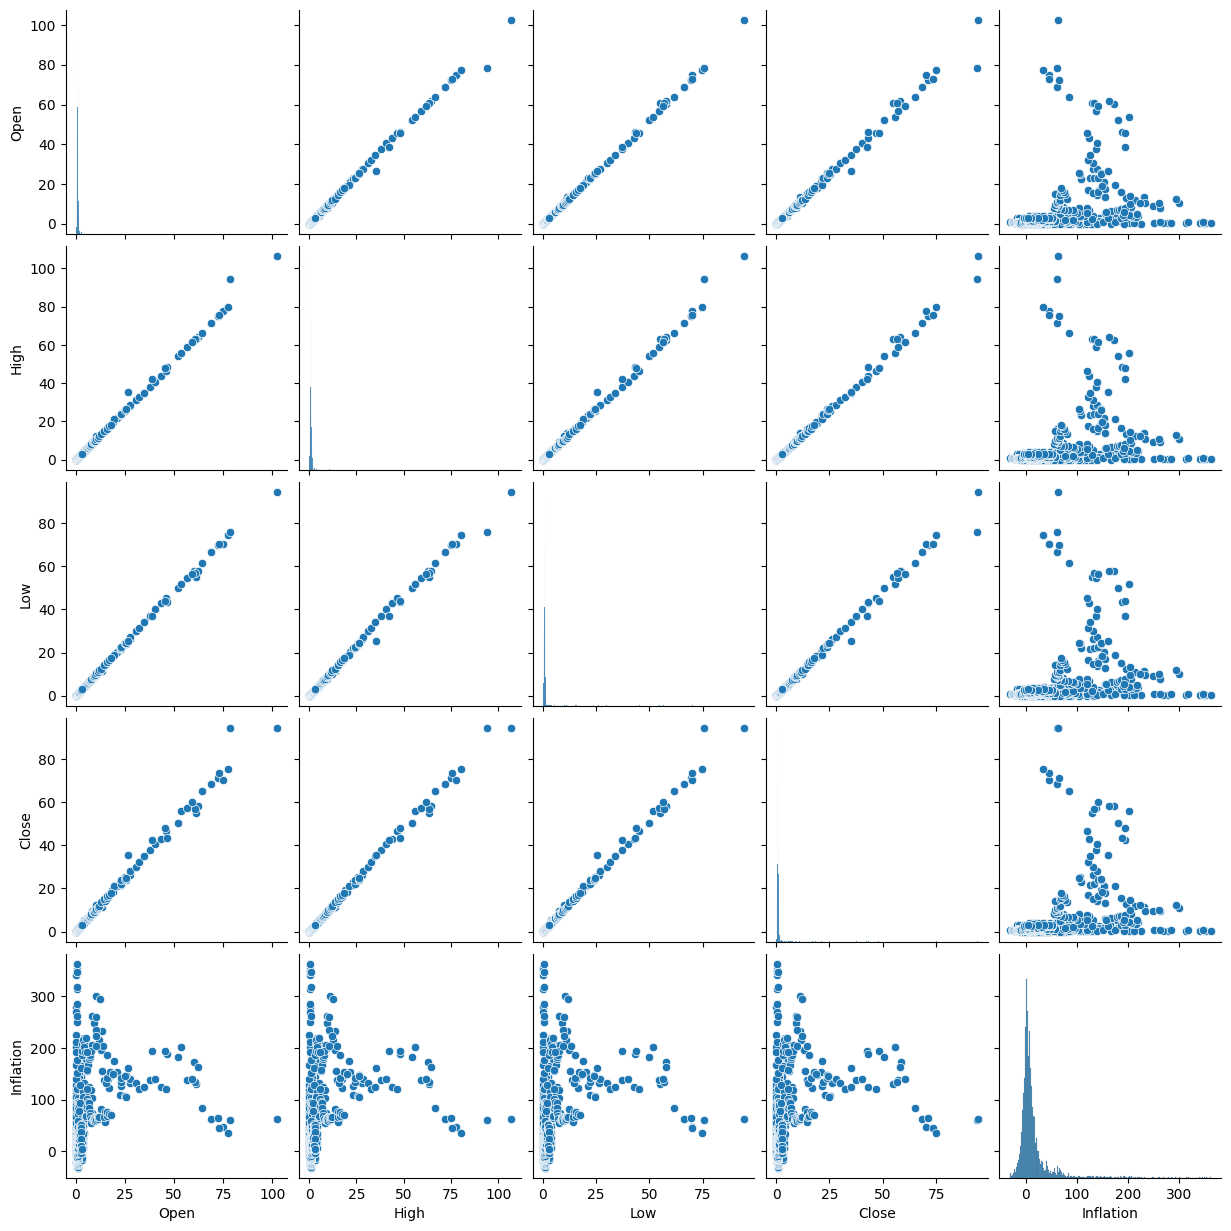

In [ ]:
sns.pairplot(food_price[['Open', 'High', 'Low','Close', 'Inflation']])
plt.show()

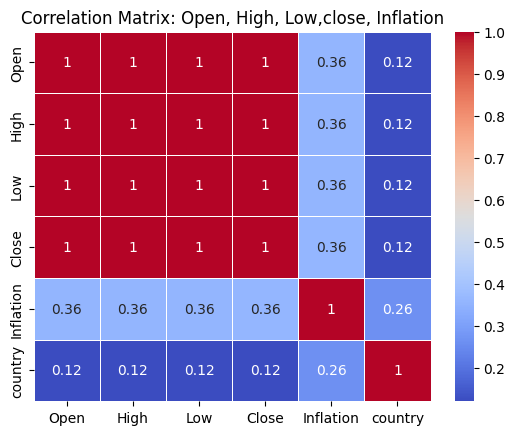

In [ ]:
correlation_matrix = food_price[['Open', 'High', 'Low','Close', 'Inflation','country']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix: Open, High, Low,close, Inflation')
plt.show()

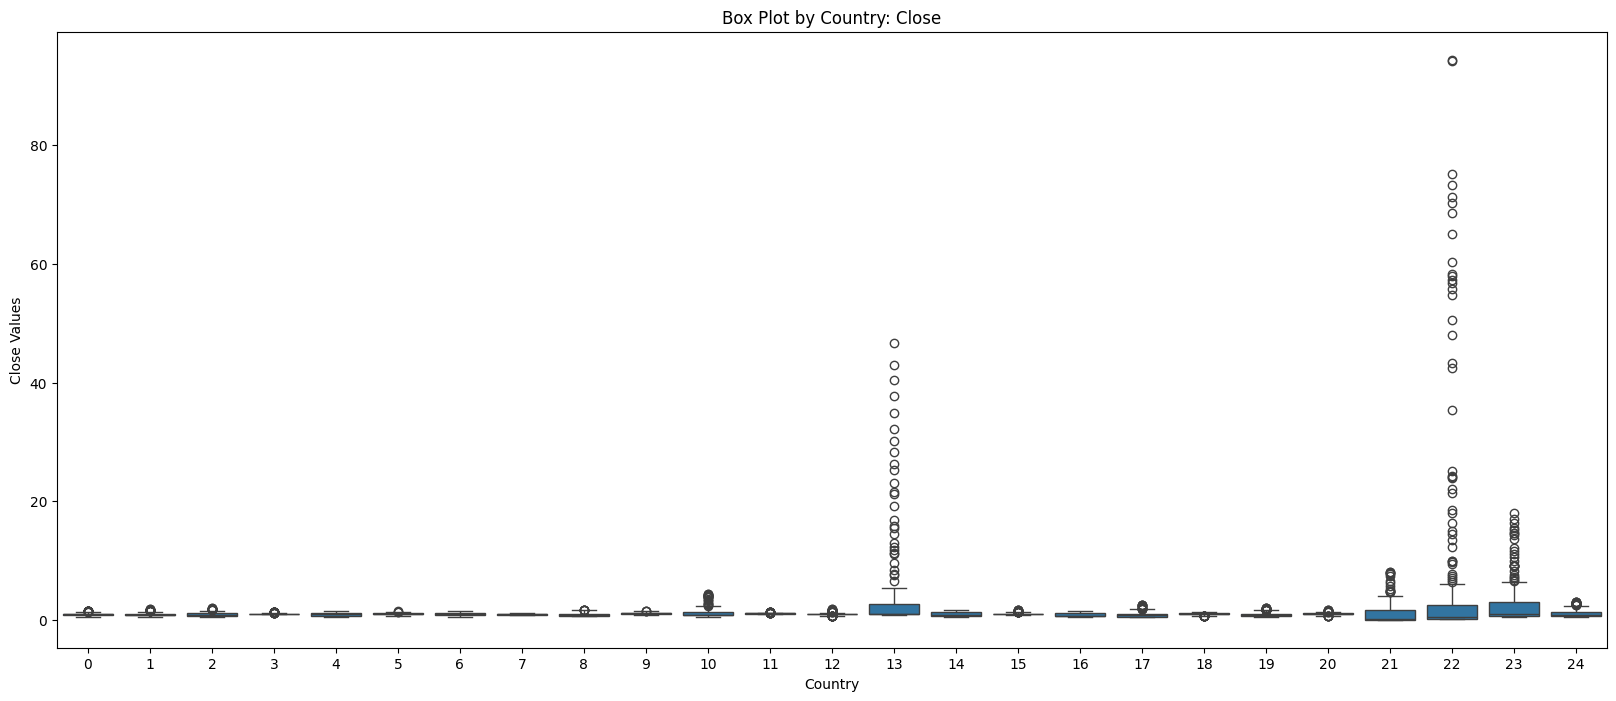

In [ ]:
plt.figure(figsize=(20, 8))
sns.boxplot(x='country', y='Close', data=food_price)
plt.title('Box Plot by Country: Close')
plt.xlabel('Country')
plt.ylabel('Close Values')
plt.show()

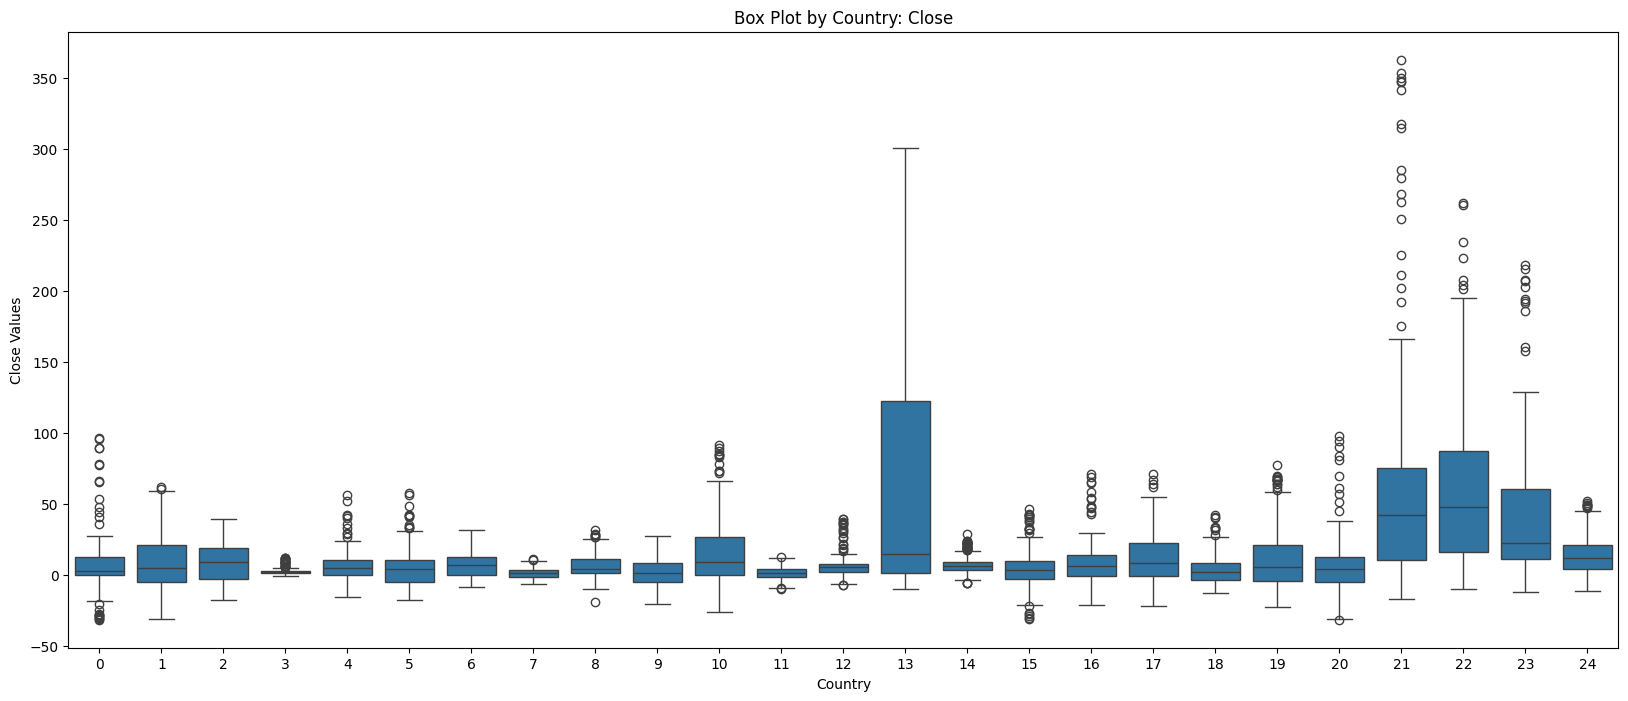

In [ ]:
plt.figure(figsize=(20, 8))
sns.boxplot(x='country', y='Inflation', data=food_price)
plt.title('Box Plot by Country: Close')
plt.xlabel('Country')
plt.ylabel('Close Values')
plt.show()

<Axes: xlabel='year', ylabel='Inflation'>

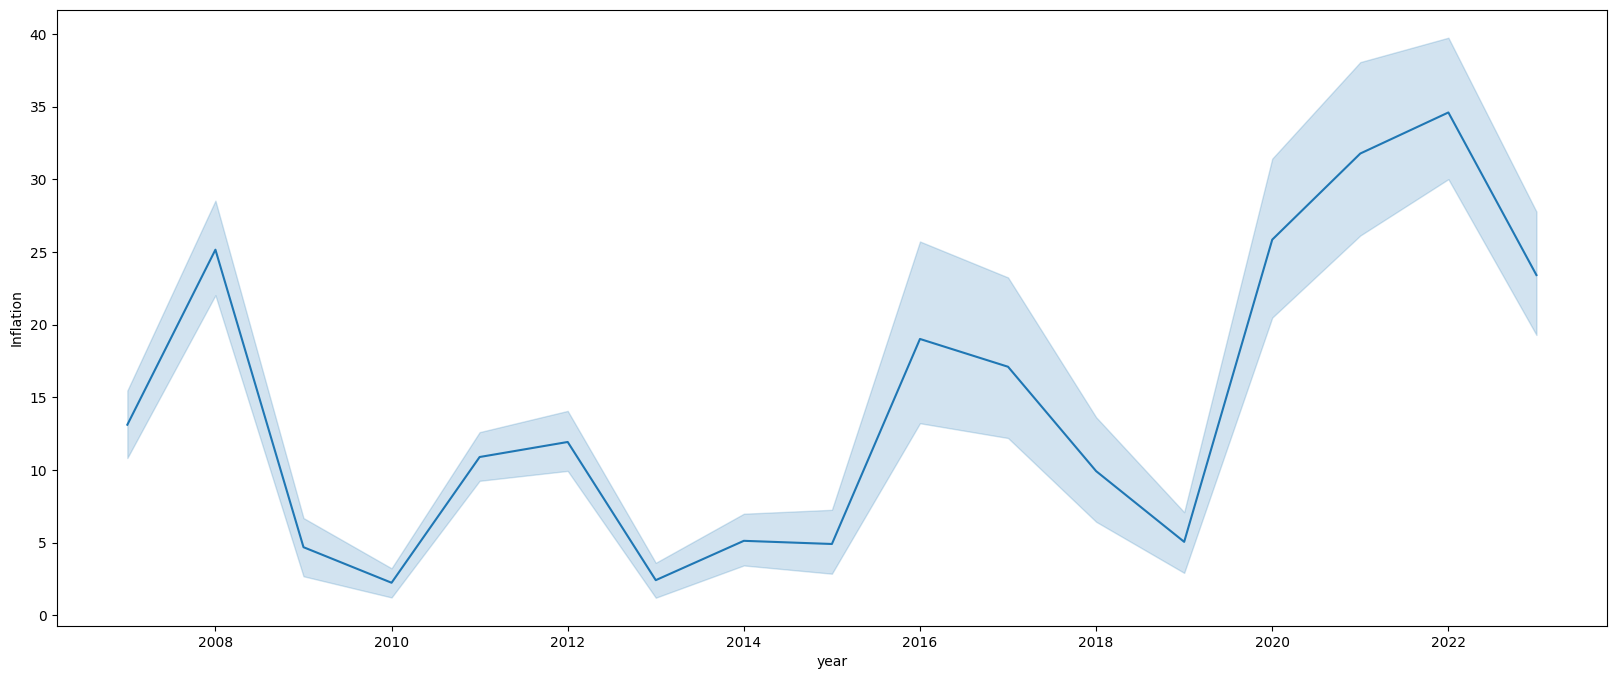

In [ ]:
plt.figure(figsize=(20,8))
sns.lineplot(x ='year',y='Inflation',data = food_price )

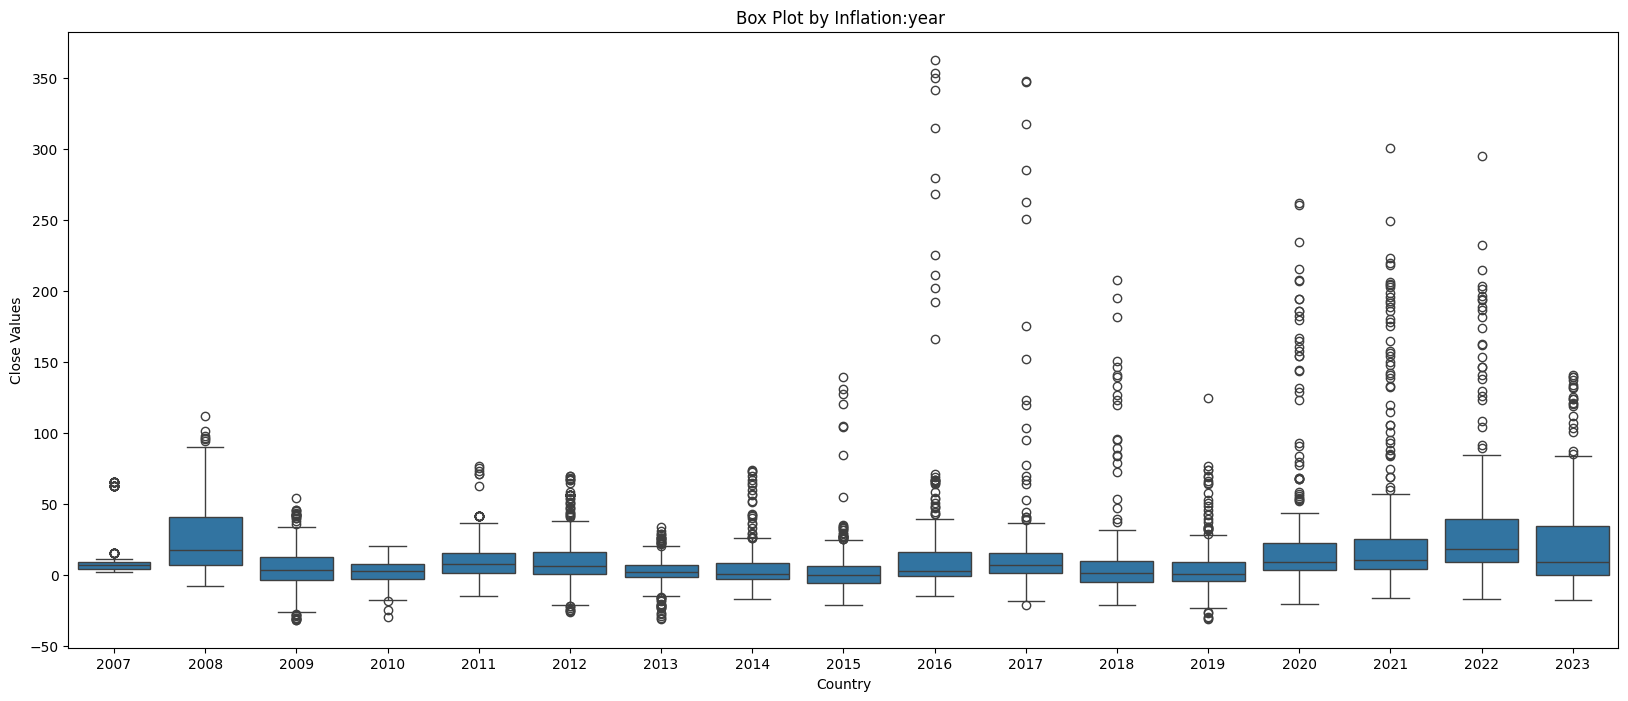

In [ ]:
plt.figure(figsize=(20, 8))
sns.boxplot(x='year', y='Inflation', data=food_price)
plt.title('Box Plot by Inflation:year ')
plt.xlabel('Country')
plt.ylabel('Close Values')
plt.show()

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error ,mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

In [ ]:
x = food_price[['Open', 'High', 'Low', 'Close', 'country','year','month','day']]
y = food_price['Inflation']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
 # fit the RandomForestRegressor model
RFR = RandomForestRegressor()
RFR = RandomForestRegressor(n_estimators= 50,random_state= 0)
RFR.fit(x_test,y_test)

y_train_pred = RFR.predict(x_train)
y_test_pred =  RFR.predict(x_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test,y_test_pred)
r2_train, r2_test

(0.6429094580806485, 0.9640985631753757)

In [ ]:
model = xgb.XGBRegressor(objective ='reg:squarederror', n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(x_train, y_train)
y_train_pred = model.predict(x_train)
y_test_pred =  model.predict(x_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test,y_test_pred)
r2_train, r2_test

(0.9589928493084469, 0.8639116059879006)

In [ ]:

param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

grid_search = GridSearchCV(estimator=xgb_reg, param_grid=param_grid, scoring='r2', cv=3)

# Fit the grid search to the data
grid_search.fit(x_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f'Best Hyperparameters: {best_params}')

# Make predictions with the best model
best_model = grid_search.best_estimator_
y_test_pred_best = best_model.predict(x_test)




Best Hyperparameters: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 150}


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import xgboost as xgb
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
final_model.fit(x_train_scaled, y_train)
y_train_pred = final_model.predict(x_train_scaled)
y_test_pred = final_model.predict(x_test_scaled)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print("R2 score (train):", r2_train)
print("R2 score (test):", r2_test)

R2 score (train): 0.9772164107467856
R2 score (test): 0.8842080290138717


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
final_model = xgb.XGBRegressor(objective='reg:squarederror',
                               n_estimators=150,
                               learning_rate=0.2,
                               max_depth=5,
                               random_state=42)

final_model.fit(x_train_scaled, y_train)
final_model.fit(x_train,y_train)
y_pred_train = final_model.predict(x_train)
y_pred_test = final_model.predict(x_test)
print('Mean Squared Error:' ,mean_squared_error(y_test,y_pred_test))
print('Mean Absolute Error:',mean_absolute_error(y_test,y_pred_test))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,y_pred_test)))
print(r2_score(y_test,y_pred_test))

Mean Squared Error: 124.12828476456774
Mean Absolute Error: 6.445710637885207
Root Mean Squared Error: 11.141287392602694
0.8842080290138717


In [ ]:
user_data = np.array([[2.77, 2.81, 2.73, 2.81, 24, 2023, 7, 1]])
y_p = final_model.predict(user_data)
print(y_p[0])

66.10442


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

# Assuming x and y are already defined as shown in your project
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize the KNN model
knn_model = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors

# Fit the model
knn_model.fit(x_train, y_train)

# Predictions
y_pred_train_knn = knn_model.predict(x_train)
y_pred_test_knn = knn_model.predict(x_test)

# Evaluation
print('KNN Training Mean Squared Error:', mean_squared_error(y_train, y_pred_train_knn))
print('KNN Testing Mean Squared Error:', mean_squared_error(y_test, y_pred_test_knn))
print('KNN Testing R^2 Score:', r2_score(y_test, y_pred_test_knn))

KNN Training Mean Squared Error: 217.4614505352942
KNN Testing Mean Squared Error: 382.66422380250236
KNN Testing R^2 Score: 0.643035068244037


In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Splitting the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize SVR
svr_regressor = SVR(kernel='rbf', C=1.0, epsilon=0.1)  # These are default values, adjust as needed

# Fit the model on the training data
svr_regressor.fit(x_train, y_train)

# Predict on the test set
y_pred = svr_regressor.predict(x_test)

# Evaluate the model
print("SVR R^2 Score on Test Set:", r2_score(y_test, y_pred))
print("SVR Mean Squared Error on Test Set:", mean_squared_error(y_test, y_pred))

SVR R^2 Score on Test Set: -0.06810176582989946
SVR Mean Squared Error on Test Set: 1144.9985609309172


In [ ]:

from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

# Impute missing values with the mean of the column
imputer = SimpleImputer(strategy='mean')
data[['Open', 'High', 'Low', 'Close']] = imputer.fit_transform(data[['Open', 'High', 'Low', 'Close']])

# Extracting the features and target variable
X = data[['Open', 'High', 'Low']]
y = data['Close']

# Creating and fitting the linear regression model
model = LinearRegression()
model.fit(X, y)

# Getting the coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [-1.94140011  1.24149006  1.71165155]
Intercept: -0.002093365338776021


<ipython-input-32-9ebc0a7c4268>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  afghanistan_data['date'] = pd.to_datetime(afghanistan_data['date'])


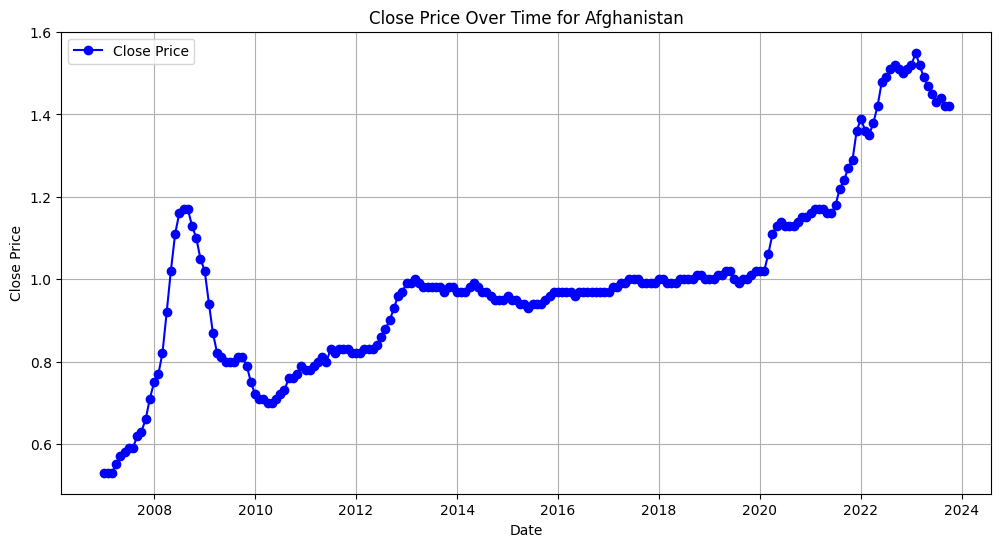

In [ ]:
import matplotlib.pyplot as plt
afghanistan_data = df[df['country'] == 'Afghanistan']

# Convert 'date' column to datetime format
afghanistan_data['date'] = pd.to_datetime(afghanistan_data['date'])

# Plot the graph
plt.figure(figsize=(12, 6))
plt.plot(afghanistan_data['date'], afghanistan_data['Close'], marker='o', color='b', label='Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Price Over Time for Afghanistan')
plt.legend()
plt.grid(True)
plt.show()

<ipython-input-33-3a740c8b82e7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  afghanistan_data['date'] = pd.to_datetime(afghanistan_data['date'])
<ipython-input-33-3a740c8b82e7>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  afghanistan_data['year'] = afghanistan_data['date'].dt.year


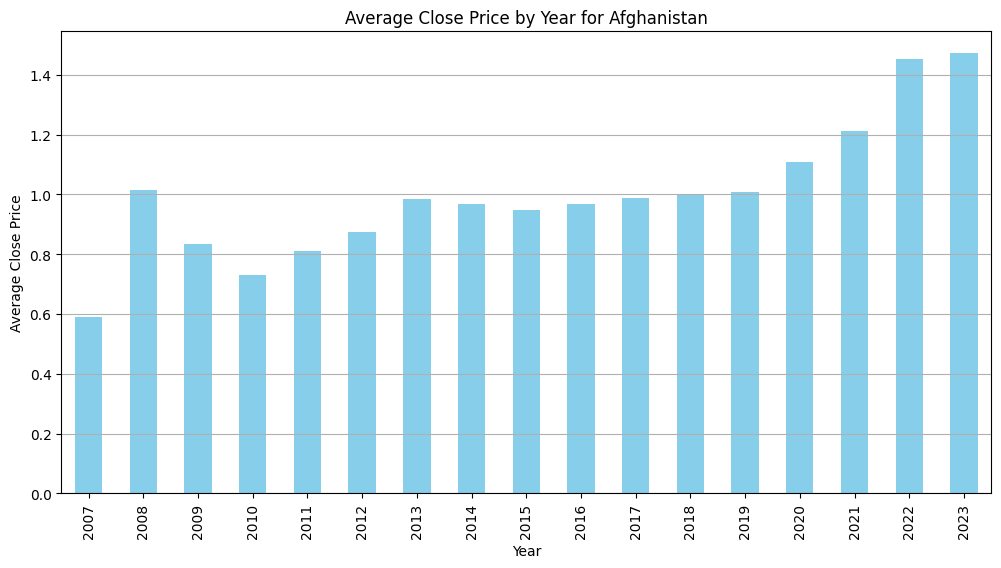

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt



# Filter data for Afghanistan
afghanistan_data = df[df['country'] == 'Afghanistan']

# Convert 'date' column to datetime format
afghanistan_data['date'] = pd.to_datetime(afghanistan_data['date'])

# Extract year from the date
afghanistan_data['year'] = afghanistan_data['date'].dt.year

# Calculate average close price by year
average_close_by_year = afghanistan_data.groupby('year')['Close'].mean()

# Plot the bar graph
plt.figure(figsize=(12, 6))
average_close_by_year.plot(kind='bar', color='skyblue')
plt.xlabel('Year')
plt.ylabel('Average Close Price')
plt.title('Average Close Price by Year for Afghanistan')
plt.grid(axis='y')
plt.show()

In [ ]:
import pickle
# save the regression model by using pickle

with open("/content/WLD_RTFP_country_2023-10-02.csv", 'wb') as f:
    pickle.dump(final_model, f)


In [ ]:
#hyperparameter tuning
with open("/content/WLD_RTFP_country_2023-10-02.csv", 'rb') as f:
    model = pickle.load(f)

user_data = np.array([[0.53, 0.55, 0.53, 0.55, 0, 2007, 4, 1]])


prediction = model.predict(user_data)
inflation = prediction[0]

print("Predicted Inflation:", inflation)


Predicted Inflation: 54.13668
